Problem Statement:Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

Predict The Flight Ticket Price Hackathon
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [136]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
# Read Both Train and Test files

train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [138]:
#Functions to Check if columns are of Contineous or discrete variable based on the unique count 25.
def get_variable_type(element) :  
    if element==0:
        return "Not Known"
    elif element < 25 and element!=0 :
        return "Discrete"
    elif element >= 25 and element!=0 :
        return "Contineous" 
    
def get_meta_data(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int), 
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Unique_Values_Count': dataframe.nunique().astype(int) 
                     })
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    return metadata_matrix

In [139]:
train_df.shape,test_df.shape

((10683, 11), (2671, 10))

In [140]:
# Append both datasets with sort=False so that we can split after datacleaning
big_df=train_df.append(test_df,sort=False)
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [141]:
get_meta_data(big_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Airline,object,13354,0,0.000000,12,Discrete
Date_of_Journey,object,13354,0,0.000000,44,Contineous
Source,object,13354,0,0.000000,5,Discrete
Destination,object,13354,0,0.000000,6,Discrete
Route,object,13353,1,0.007488,132,Contineous
Dep_Time,object,13354,0,0.000000,223,Contineous
Arrival_Time,object,13354,0,0.000000,1451,Contineous
Duration,object,13354,0,0.000000,374,Contineous
Total_Stops,object,13353,1,0.007488,5,Discrete
Additional_Info,object,13354,0,0.000000,10,Discrete


### Feature Engineering

In [142]:
#Date_of_Journey - Split to have seperate columns
big_df['Journey_Date'] = big_df['Date_of_Journey'].str.split('/').str[0].astype(int)
big_df['Journey_Month'] = big_df['Date_of_Journey'].str.split('/').str[1].astype(int)
big_df['Journey_Year'] = big_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [143]:
#Arrival_Time - Split to have seperate columns
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0].astype(int)
big_df['Arrival_Minutes'] = big_df['Arrival_Time'].str.split(':').str[1].astype(int)

In [144]:
#Dep_Time - Split to have seperate columns
big_df['Dep_Hour'] = big_df['Dep_Time'].str.split(':').str[0].astype(int)
big_df['Dep_Minutes'] = big_df['Dep_Time'].str.split(':').str[1].astype(int)

In [145]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [247]:
## Replace the nulls as obeserved above for Total_stops and Route

In [146]:
big_df['Route'] = big_df['Route'].fillna('DEL → COK')

In [147]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('0 stop')
#Total Stops - Split to have only numeric value
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0].astype(int)

In [148]:
#Duration - Split to have only numeric value
big_df['Duration'] = big_df['Duration'].str.replace('h','')
big_df['Duration'] = big_df['Duration'].str.replace('m','')
big_df['Duration'] = big_df['Duration'].str.replace(' ',':')
big_df['Duration_Hour'] = big_df['Duration'].str.split(':').str[0].astype(int)
big_df['Duration_Minute'] = big_df['Duration'].str.split(':').str[1]
big_df['Duration_Minute'] = big_df['Duration_Minute'].fillna(0).astype(int)

In [149]:
#Drop the columns since these have been split to have seperate columns.
big_df = big_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

In [150]:
big_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [151]:
get_meta_data(big_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Airline,object,13354,0,0.000000,12,Discrete
Source,object,13354,0,0.000000,5,Discrete
Destination,object,13354,0,0.000000,6,Discrete
Route,object,13354,0,0.000000,132,Contineous
Total_Stops,int32,13354,0,0.000000,5,Discrete
Additional_Info,object,13354,0,0.000000,10,Discrete
Price,float64,10683,2671,20.001498,1870,Contineous
Journey_Date,int32,13354,0,0.000000,10,Discrete
Journey_Month,int32,13354,0,0.000000,4,Discrete
Journey_Year,int32,13354,0,0.000000,1,Discrete


1.8125523782189141

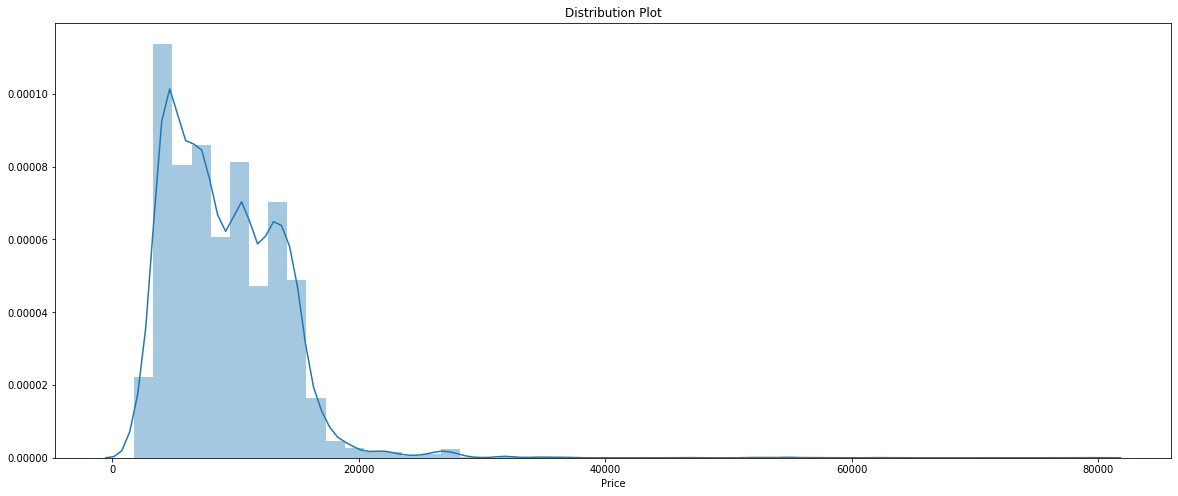

In [152]:
# We know that 2671 missing values in Proce columns is coming from Test dataset. Just for now fillna with median.
plt.figure(figsize=(20,8))
plt.title('Distribution Plot')
sns.distplot(big_df.Price)
big_df['Price'].skew()

In [153]:
big_df['Price'] = big_df['Price'].fillna(big_df['Price'].median())

In [154]:
get_meta_data(big_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Airline,object,13354,0,0.0,12,Discrete
Source,object,13354,0,0.0,5,Discrete
Destination,object,13354,0,0.0,6,Discrete
Route,object,13354,0,0.0,132,Contineous
Total_Stops,int32,13354,0,0.0,5,Discrete
Additional_Info,object,13354,0,0.0,10,Discrete
Price,float64,13354,0,0.0,1870,Contineous
Journey_Date,int32,13354,0,0.0,10,Discrete
Journey_Month,int32,13354,0,0.0,4,Discrete
Journey_Year,int32,13354,0,0.0,1,Discrete


In [155]:
pd.set_option('display.max_rows', 200)
big_df['Route'].value_counts()

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             263
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 100
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → BHO → BOM → COK                  59
DEL → CCU → BOM → COK             

In [156]:
#Split the Route Column and drop the ROUTE column after split
big_df['Route1'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route2'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route3'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route4'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route5'] = big_df['Route'].str.split('→ ').str[4]
big_df['Route6'] = big_df['Route'].str.split('→ ').str[5]

In [157]:
big_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Duration_Hour,Duration_Minute,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,1,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,13,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,4,25,9,25,19,0,DEL,LKO,BOM,COK,NaN,NaN


In [158]:
big_df['Route1'] = big_df['Route1'].fillna("NA")
big_df['Route2'] = big_df['Route2'].fillna("NA")
big_df['Route3'] = big_df['Route3'].fillna("NA")
big_df['Route4'] = big_df['Route4'].fillna("NA")
big_df['Route5'] = big_df['Route5'].fillna("NA")
big_df['Route6'] = big_df['Route6'].fillna("NA")
big_df = big_df.drop(['Route'],axis=1)

In [159]:
get_meta_data(big_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Airline,object,13354,0,0.0,12,Discrete
Source,object,13354,0,0.0,5,Discrete
Destination,object,13354,0,0.0,6,Discrete
Total_Stops,int32,13354,0,0.0,5,Discrete
Additional_Info,object,13354,0,0.0,10,Discrete
Price,float64,13354,0,0.0,1870,Contineous
Journey_Date,int32,13354,0,0.0,10,Discrete
Journey_Month,int32,13354,0,0.0,4,Discrete
Journey_Year,int32,13354,0,0.0,1,Discrete
Arrival_Hour,int32,13354,0,0.0,24,Discrete


In [160]:
#Drop the column Journey_Year since it contains 2019 alone.
big_df=big_df.drop(['Journey_Year'],axis=1)
pd.set_option('display.max_columns', 200)
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Duration_Hour,Duration_Minute,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,1,10,22,20,2,50,BLR,DEL,NA,NA,NA,NA
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,13,15,5,50,7,25,CCU,IXR,BBI,BLR,NA,NA
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,4,25,9,25,19,0,DEL,LKO,BOM,COK,NA,NA
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,23,30,18,5,5,25,CCU,NAG,BLR,NA,NA,NA
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,21,35,16,50,4,45,BLR,NAG,DEL,NA,NA,NA


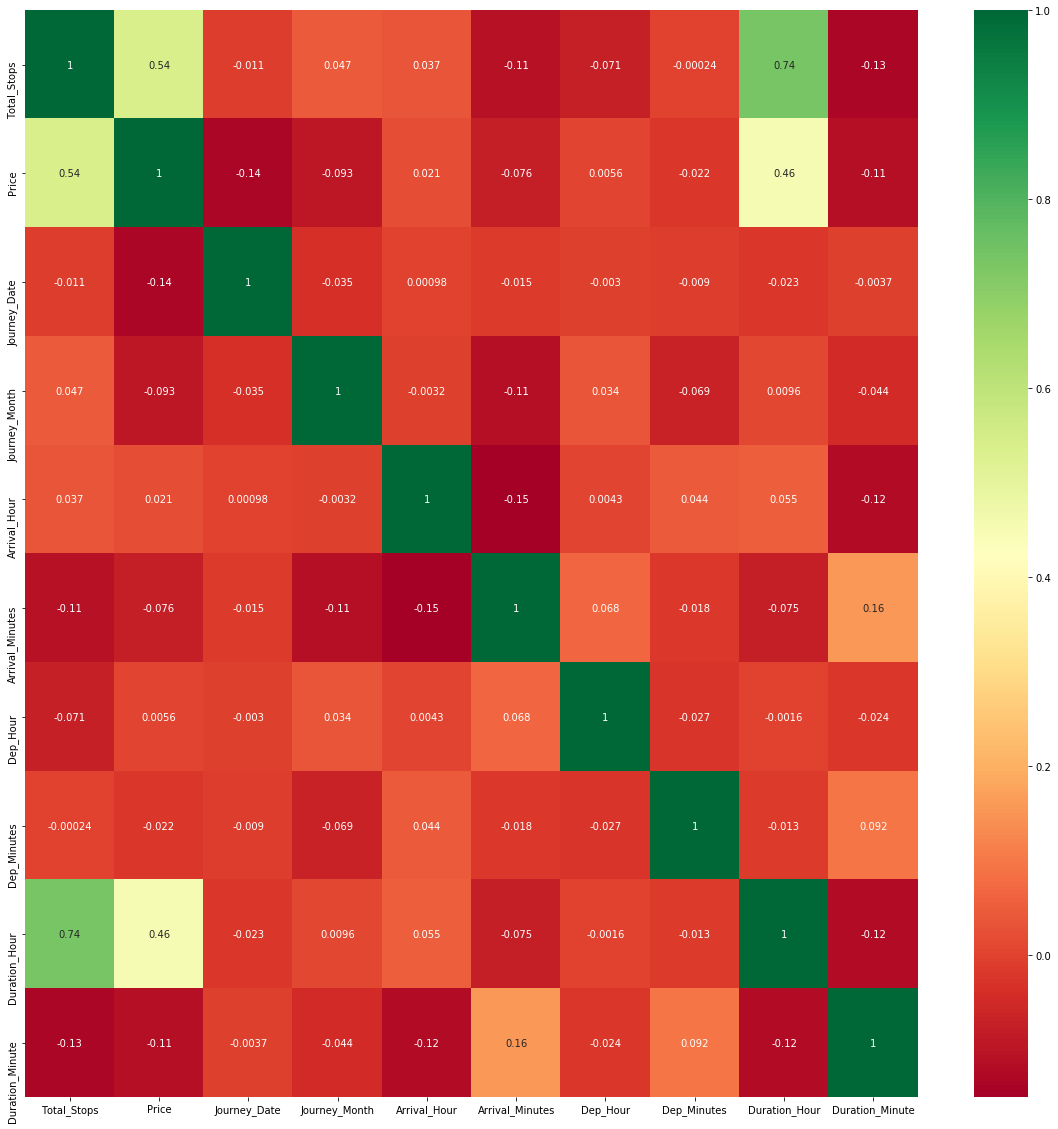

In [161]:
#plot heat map
# From below HEATMAP we know that Price columns is corelated with Total_stops and Duration_hour columns.
plt.figure(figsize=(20,20))
sns.heatmap(big_df.corr(),annot=True,cmap="RdYlGn")

### Feature Selection.

In [162]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [163]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [164]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for fet in list(df_train.columns):
    if df_train[fet].dtype == 'O':
        df_train[fet] = encoder.fit_transform(df_train[fet])
for fet in list(df_test.columns):
    if df_test[fet].dtype == 'O':
        df_test[fet] = encoder.fit_transform(df_test[fet])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [167]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [168]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_Date', 'Journey_Month', 'Arrival_Hour', 'Arrival_Minutes',
       'Dep_Hour', 'Dep_Minutes', 'Duration_Hour', 'Duration_Minute', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [169]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(model.feature_importances_)

[0.12992851 0.01110849 0.02261193 0.17458843 0.06831242 0.1212442
 0.04728991 0.02018647 0.01430661 0.02006519 0.01759182 0.07422805
 0.01465907 0.01565997 0.05043042 0.18137947 0.01612576 0.00028327
 0.        ]


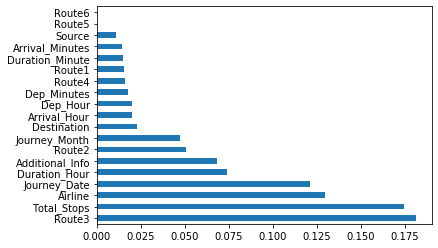

In [170]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

#### Based on the two techniques used, Lasso Feature Selection and Extra Tree Regressor Feature Importance, ROUTE6 is of now use, And most significant features in predicting flight proces are:
 - Total Stops
 - Journey Date/Month
 - Duration Hour
 - Destination

In [171]:
X_train = X_train.drop(['Route6'],axis=1)
X_test = X_test.drop(['Route6'],axis=1)

### Model Evaluation and Predictions.
#### Used below regression algorithms and found that XGBoost regressor produces best accuracy with less RMSE value.
 - Linear Regression
 - Randomforest Regressor
 - XGBoost Regressor
 - DecisionTree Regressor
 - Ridge Regression
 - Lasso Regression
 - KNN Regressor

### Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,X_train,y_train,cv=5)
print(score)
print(score.mean())

[0.46134169 0.4807689  0.53522561 0.4929257  0.49675417]
0.49340321333018294


In [174]:
prediction=lm.predict(X_test)

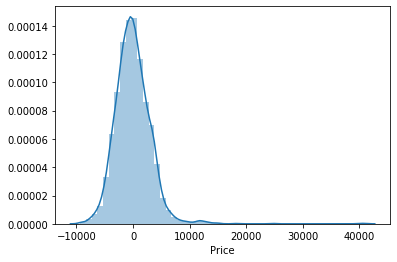

In [175]:
sns.distplot(y_test-prediction)

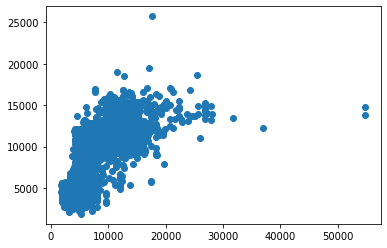

In [176]:
plt.scatter(y_test,prediction)

In [177]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

r2: 0.5080546396933876
MAE: 2301.3233251670563
MSE: 9965066.861196391
RMSE: 3156.749413747691


### RandomForest Regressor

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [179]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [180]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [181]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [182]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)
random_search.fit(X_train,y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 44.9min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [183]:
rfc=random_search.best_estimator_ # Take the parameters from estimators
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [184]:
y_pred_rf=rfc.predict(X_test)

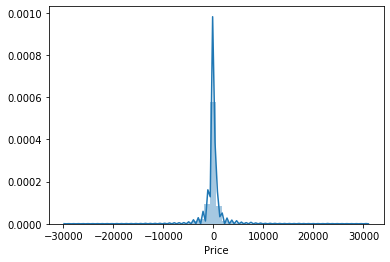

In [185]:
sns.distplot(y_test-y_pred_rf)

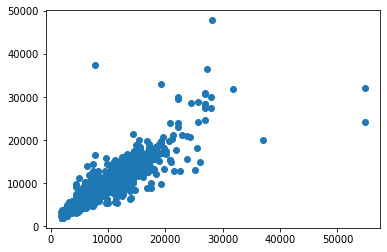

In [186]:
plt.scatter(y_test,y_pred_rf)

In [187]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_rf))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2: 0.8708634669958213
MAE: 700.9182795675422
MSE: 2615847.7941690185
RMSE: 1617.3582763781865


### XGBoost Regressor

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [215]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}
xg=xgboost.XGBRegressor()
ran_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=100,n_jobs=-1,cv=folds,verbose=3,random_state=42)
ran_search.fit(X_train,y_train)
print(ran_search.best_params_)
print(ran_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


[13:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.5}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [216]:
xgc=ran_search.best_estimator_   # Take the parameters from estimators
xgc.fit(X_train,y_train)

[13:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [217]:
y_pred_xg=xgc.predict(X_test)

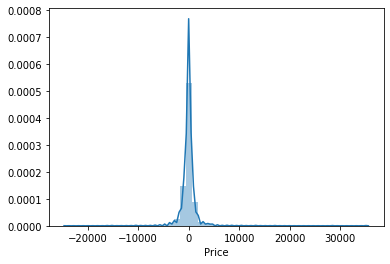

In [218]:
sns.distplot(y_test-y_pred_xg)

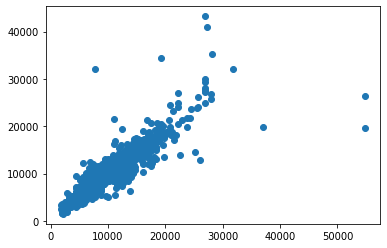

In [219]:
plt.scatter(y_test,y_pred_xg)

In [220]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_xg))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

r2: 0.8797110552833753
MAE: 727.4237087969847
MSE: 2436627.059592189
RMSE: 1560.9699098932654


### DecisionTree Regressor

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [196]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor()
#folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
params={
  "criterion" :['mse','mae'],
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]   
}

ran_search=RandomizedSearchCV(dtree,param_distributions=params,n_iter=70,n_jobs=-1,cv=5,verbose=3)
ran_search.fit(X_train,y_train)
print(ran_search.best_params_)
print(ran_search.best_estimator_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   53.7s


{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'mse'}
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.2, presort='deprecated',
                      random_state=None, splitter='best')


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.2min finished


In [197]:
dtc=ran_search.best_estimator_            # Take the parameters from estimators
dtc.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.2, presort='deprecated',
                      random_state=None, splitter='best')

In [198]:
y_pred_dt=dtc.predict(X_test)

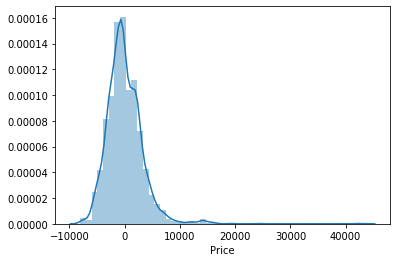

In [199]:
sns.distplot(y_test-y_pred_dt)

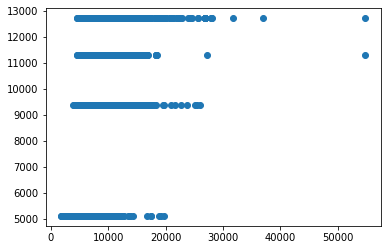

In [200]:
plt.scatter(y_test,y_pred_dt)

In [201]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_dt))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

r2: 0.4622788536663437
MAE: 2349.156284455393
MSE: 10892321.806946877
RMSE: 3300.3517701825176


### Ridge Regression

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [203]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.87228e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.74921e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.75432e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.79122e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.77761e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_r

{'alpha': 5}
0.4934249072192835


In [204]:
y_pred_ri=ridge_regressor.predict(X_test)

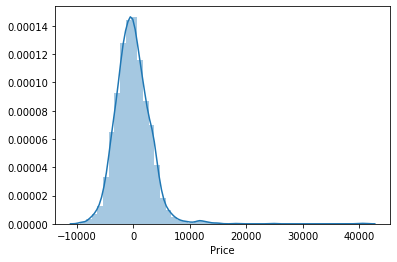

In [205]:
sns.distplot(y_test-y_pred_ri)

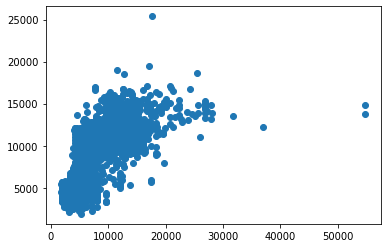

In [206]:
plt.scatter(y_test,y_pred_ri)

In [207]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_ri))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ri))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ri)))

r2: 0.5080428290707225
MAE: 2301.106583169175
MSE: 9965306.102490295
RMSE: 3156.7873071352615


### Lasso Regression

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [209]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31343278109.410954, tolerance: 12632186.131948445
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32202026055.348446, tolerance: 12824777.786637666
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34483479861.89459, tolerance: 13421549.307022352
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

{'alpha': 5}
0.49345280878229525


In [210]:
y_pred_ls=lasso_regressor.predict(X_test)

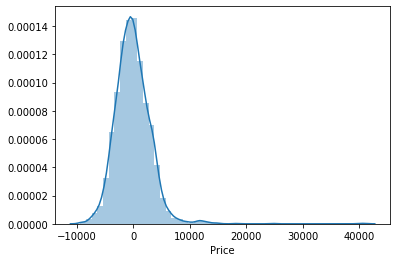

In [211]:
sns.distplot(y_test-y_pred_ls)

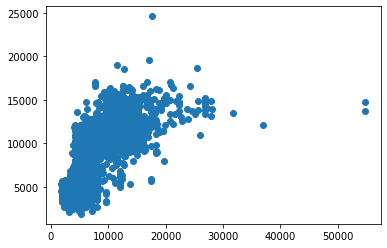

In [212]:
plt.scatter(y_test,y_pred_ls)

In [213]:
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_ri))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ri))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ri)))

r2: 0.5080428290707225
MAE: 2301.106583169175
MSE: 9965306.102490295
RMSE: 3156.7873071352615


### KNN Regressor

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [223]:
from sklearn.neighbors import KNeighborsRegressor

In [224]:
accuracy_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

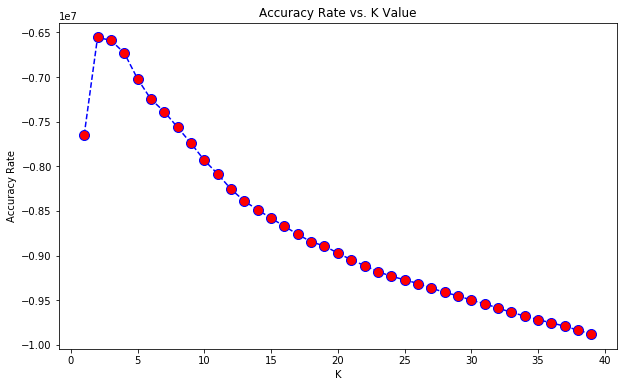

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [231]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_kn = knn.predict(X_test)
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_kn))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_kn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_kn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn)))

r2: 0.6199775999656216
MAE: 1779.6609048361936
MSE: 7697904.95175039
RMSE: 2774.5098579299356


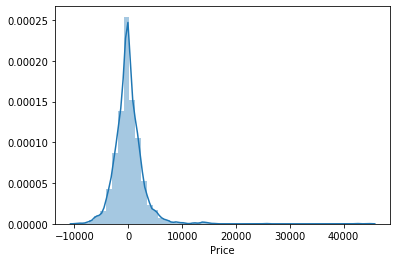

In [232]:
sns.distplot(y_test-y_pred_kn)

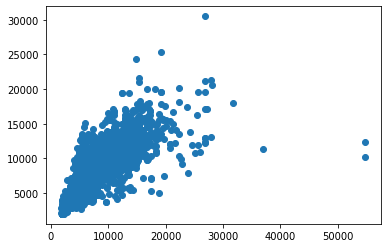

In [233]:
plt.scatter(y_test,y_pred_kn)

#### Since XGBoost regressor gave the best accuracy with lowest RMSE value, using this model to predict the values in the test dataset and writing it to Excel file as per requirement.

In [245]:
X_to_predict=df_test.drop(['Price'],axis=1)

def generateFinalPredictionFile(model):
    y_test_pred = model.predict(X_to_predict)
#    y_test_pred_exp = np.exp(y_test_pred)
    print(y_test_pred)
    pd.DataFrame(y_test_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)
generateFinalPredictionFile(xgc)

[10405.45    6334.066  31614.475  ... 13130.3545 14037.374   7348.9927]
